In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
import random
from collections import defaultdict
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\onomatopeia\.conda\envs\modelling-ncov2019\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import os
if os.getcwd().endswith('notebooks'):
    os.chdir(os.path.join(os.getcwd(), os.pardir))
# os.getcwd()

In [4]:
from bootstrapping import attack_rate

## Load index cases

Load all index cases from the patient database. These patients are already filtered by Marcin and contain only thoses cases who live in households smaller than 15. 

In [5]:
index_cases = attack_rate.get_patient_data()
index_cases_grouped_by_age = attack_rate.get_index_cases_grouped_by_age(index_cases)
elderly_grouped = attack_rate.get_elderly_patient_data(index_cases)

In [6]:
age_min = index_cases_grouped_by_age.age.min()

In [7]:
age_max = index_cases_grouped_by_age.age.max() + 1

In [8]:
print(f'Youngest index case: {age_min} years old, oldest index case: {age_max-1} years old')

Youngest index case: 0 years old, oldest index case: 98 years old


In [9]:
print(f'Number of cases: {len(index_cases.index)}')

Number of cases: 9749


# Attack rate calculator

In [10]:
calc = attack_rate.AttackRate()

# $\lambda$

As in Marcin's calculations, possible $\lambda$ values are as follows:

In [11]:
lambdas = calc.get_lambdas()
lambdas

array([0.00097656, 0.00109357, 0.0012246 , 0.00137133, 0.00153565,
       0.00171965, 0.00192569, 0.00215642, 0.00241481, 0.00270414,
       0.00302815, 0.00339098, 0.00379728, 0.00425227, 0.00476177,
       0.00533232, 0.00597123, 0.0066867 , 0.00748789, 0.00838508,
       0.00938977, 0.01051485, 0.01177472, 0.01318555, 0.01476543,
       0.01653461, 0.01851576, 0.0207343 , 0.02321866, 0.02600069,
       0.02911606, 0.03260472, 0.03651137, 0.04088612, 0.04578505,
       0.05127096, 0.05741418, 0.06429348, 0.07199705, 0.08062365,
       0.09028388, 0.10110159, 0.11321546, 0.1267808 , 0.14197152,
       0.15898238, 0.17803146, 0.19936297, 0.2232504 , 0.25      ])

# $\mu_k\left(\lambda\right)$

This section was calculated by Marcin, here I'm just loading his results. `household_size` includes an index case.

In [12]:
mu_k_lambda = calc.get_mu_k_lambda()

In [13]:
mu_k_lambda

lambda,0.0009765625,0.00109357304700408,0.0012246036573529983,0.001371334198214511,0.0015356458164247958,0.0017196450555768113,0.001925690862789257,0.002156424831394164,0.0024148050672670464,0.0027041441129800866,...,0.09028388088789618,0.10110158716716036,0.1132154580329883,0.12678079837091588,0.1419715215115185,0.1589823788719683,0.17803145675056684,0.19936297228420347,0.22325040441408134,0.25
k,,,,,,,,,,,,,,,,,,,,,
2,0.0004,0.0008,0.0014,0.0018,0.0022,0.0008,0.0028,0.0020,0.0026,0.0026,...,0.0908,0.0982,0.1112,0.1318,0.1446,0.1552,0.1912,0.1954,0.2132,0.2664
3,0.0022,0.0026,0.0018,0.0016,0.0034,0.0026,0.0042,0.0052,0.0052,0.0046,...,0.1880,0.2126,0.2506,0.3074,0.3198,0.3530,0.4002,0.4576,0.5224,0.6074
4,0.0034,0.0024,0.0028,0.0038,0.0052,0.0050,0.0058,0.0048,0.0092,0.0064,...,0.3238,0.3616,0.4118,0.4658,0.5372,0.6296,0.6792,0.7918,0.9130,1.0718
5,0.0028,0.0036,0.0062,0.0046,0.0054,0.0076,0.0082,0.0092,0.0102,0.0102,...,0.4964,0.5350,0.5978,0.6952,0.8416,0.9250,1.1012,1.2984,1.4790,1.6678
6,0.0058,0.0048,0.0044,0.0060,0.0078,0.0068,0.0100,0.0078,0.0112,0.0132,...,0.6238,0.7586,0.8592,1.0130,1.1596,1.3792,1.5772,1.8616,2.2038,2.4762
7,0.0060,0.0082,0.0088,0.0108,0.0082,0.0094,0.0134,0.0110,0.0140,0.0156,...,0.8054,0.9978,1.1710,1.3704,1.6344,1.8828,2.2528,2.6306,2.9978,3.5218
8,0.0066,0.0086,0.0086,0.0114,0.0098,0.0108,0.0132,0.0158,0.0174,0.0186,...,1.0660,1.2538,1.5250,1.8198,2.1652,2.4854,3.0546,3.4752,4.0850,4.5400
9,0.0074,0.0094,0.0088,0.0112,0.0116,0.0150,0.0142,0.0202,0.0234,0.0206,...,1.3360,1.6206,1.9552,2.4082,2.7534,3.3426,3.9538,4.5822,5.2078,5.8762
10,0.0096,0.0106,0.0106,0.0116,0.0134,0.0166,0.0148,0.0208,0.0238,0.0254,...,1.6912,2.0422,2.4604,3.0438,3.5238,4.2998,5.0374,5.7628,6.4698,7.2500


# K

In [14]:
K = calc.get_K()

In [15]:
K

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

# $p_k\left(a\right)$ and the number of index cases per voyvodship, age, gender, min household size

`[a]` - an age group. Here I assume that each age group consists of a single age. 

**Procedure**:
```
Input: t - number of trials, here: t = 10 000
Output: p - matrix of propabilities of size (|V|, |[a]|, |G|, |K|, |K|)

For each voyvodship v in V:
  For each min_household_size h in K:
    For each age group [a]: 
      For each gender g in G:
        1. choose all households of size at least h in voyvodship v where at least one person aged [a] and of gender g lives
        2. select at random (with replacement) t households from those chosen in point 1
        3. For each household chosen in point 2:
            a. determine how many people live there (k+1)
            b. p[v, [a], g, h, k+1] = p[v, [a], g, h, k+1] + 1
      end
    end
  end
end
4. p = p / t 
```

In [16]:
p, num_cases = calc.calculate_probabilities_of_household_size(index_cases_grouped_by_age, elderly_grouped)

Calculating young fellows: 100%|███████████████| 16/16 [01:50<00:00,  6.89s/it]


In [17]:
p[0,90,0,0,:]

array([0.1515, 0.2839, 0.1516, 0.0979, 0.1024, 0.079 , 0.0627, 0.0332,
       0.0208, 0.0076, 0.006 , 0.0009, 0.0013, 0.0012])

In [18]:
np.sum(p[0,90,0,0,:])

1.0000000000000002

In [19]:
p[0,40,0,0,:]

array([0.0477, 0.0903, 0.2163, 0.3039, 0.1368, 0.0876, 0.0435, 0.0301,
       0.0166, 0.0111, 0.007 , 0.0038, 0.0028, 0.0025])

In [20]:
np.sum(p[0,40,0,0,:])

0.9999999999999999

In [21]:
np.sum(num_cases)

9749.0

# $\bar{\mu}(a) = \sum_{k\geq 1} \mu_k\left(\lambda\right) p_k(a)$

In [22]:
mu_bar = calc.get_mu_bar(p, mu_k_lambda)

In [23]:
mu_bar.shape # lambda, voy, age, gender, min_household_size

(50, 16, 99, 2, 14)

In [24]:
mu_bar[0,0,40,0,:]  # 13 numbers corresponding to min_household_size of 1 to 14

array([0.003294 , 0.0034614, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       ])

In [25]:
# dlaczego tam jest tyle zer? może nie było takich przypadków wśród index cases?

In [26]:
index_cases[(index_cases.age == 40) & (index_cases.gender == 0) & (index_cases.voy == '02')]

,age,min_household_size,gender,voy
2215,40,2,0,02
4225,40,1,0,02
5820,40,1,0,02
7454,40,1,0,02
7457,40,1,0,02
9580,40,1,0,02


In [27]:
# ok, nie było.

# $\mathbb{E}I$

$ \mathbb{E}I = \sum_a |[a]|\bar{\mu}(a)$

Updated version:

$ \mathbb{E}I = \sum_v \sum_n \sum_g \sum_a |[v,a,g,n]|\bar{\mu}(v,a,g,n)$

In [28]:
ei_df = calc.get_ei(mu_bar, num_cases)

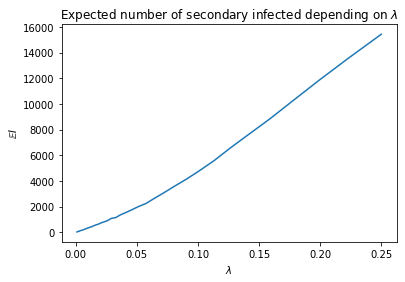

In [30]:
plt.figure()
plt.plot(ei_df['lambda'], ei_df.EI)
plt.xlabel('$\lambda$')
plt.ylabel('$\mathbb{E}I$')
plt.title('Expected number of secondary infected depending on $\lambda$')
plt.savefig(str(attack_rate.RESULTS_DIR / 'ei_df.png'))
plt.show()

# $\bar{h}(a)$

$ \bar{h}(a) = \sum_{k\geq 1} kp_k(a) $

In [31]:
bar_h = calc.get_bar_h(p)

In [32]:
bar_h.shape

(16, 99, 2, 14)

# $N^*$

In [34]:
N_asterisk = 32023

# $\mathbb{E}N^*$

$\mathbb{E}N^* = \sum_a |[a]| \bar{h}(a)$

In [35]:
EN_asterisk = calc.get_EN_asterisk(bar_h, num_cases)

In [36]:
EN_asterisk

31958.616299999998

# $G(\lambda)$

$G(\lambda) = \frac{\mathbb{E}I}{\mathbb{E}N^*}$

In [ ]:
G = calc.get_g_function(ei_df, EN_asterisk)

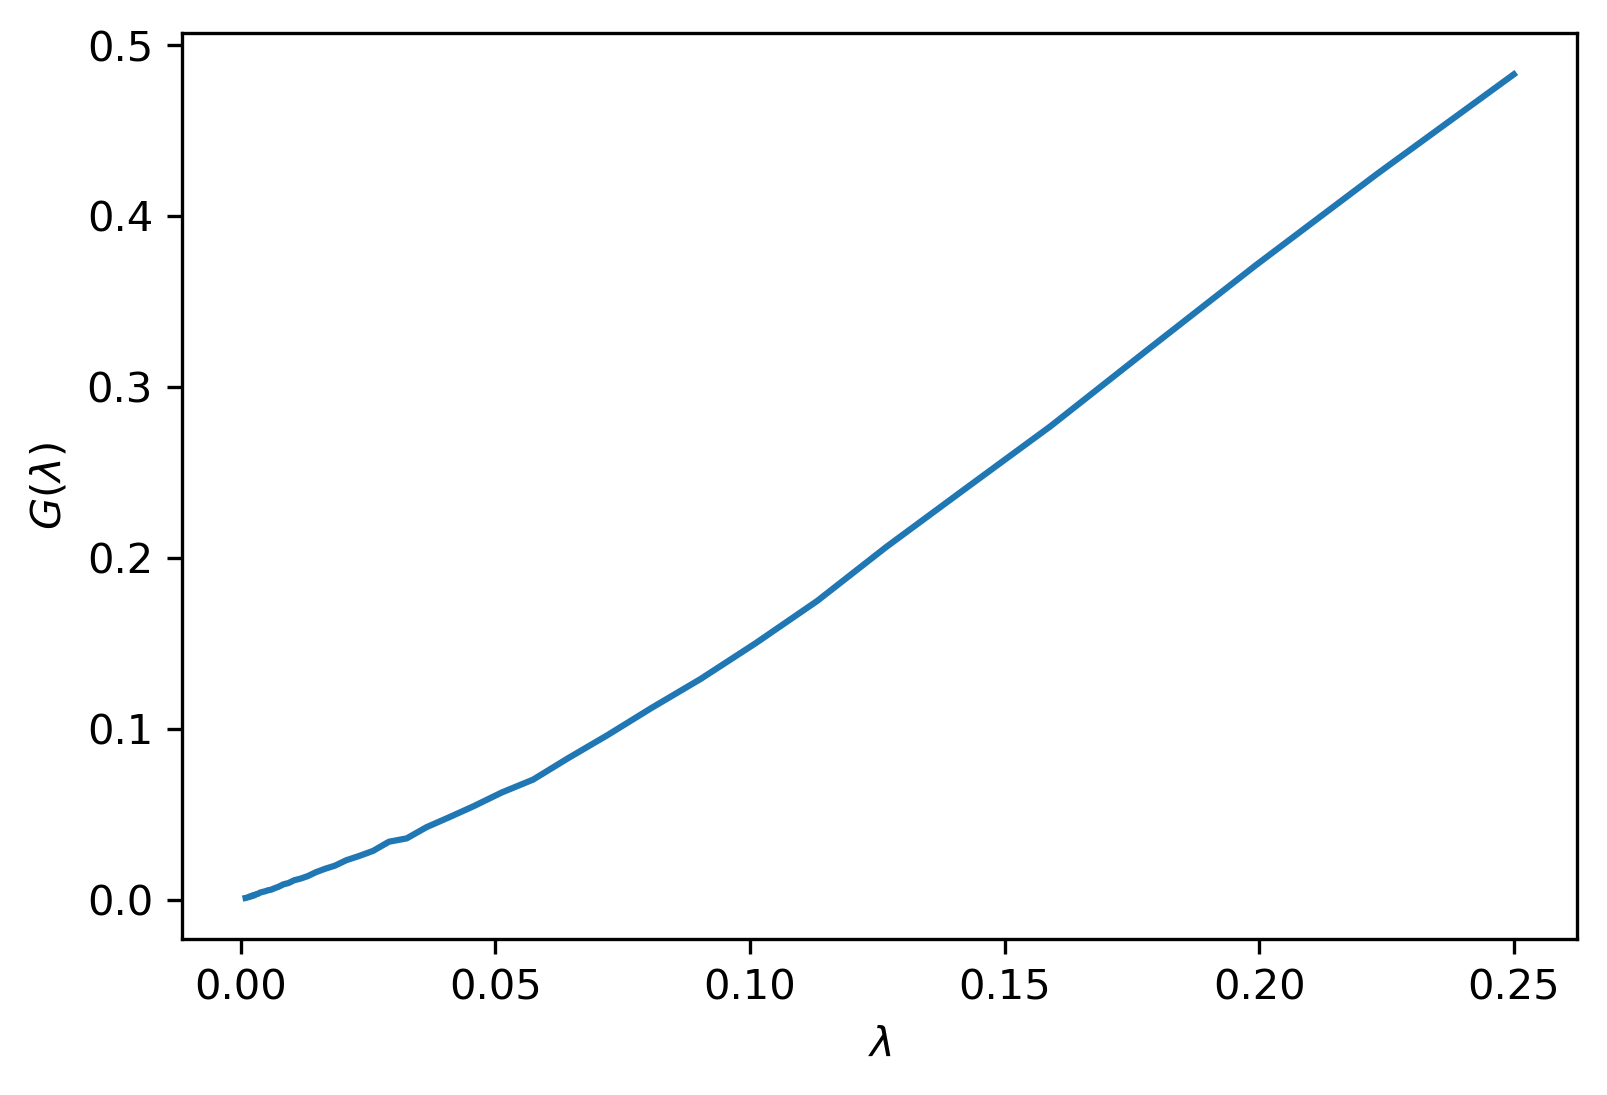

In [38]:
plt.figure(dpi=300)
plt.plot(G['lambda'], G['G'], label='$G(\lambda)$')
plt.xlabel('$\lambda$')
plt.ylabel('$G(\lambda)$')
plt.savefig(str(attack_rate.RESULTS_DIR / 'G_of_lambda.png'))
plt.show()

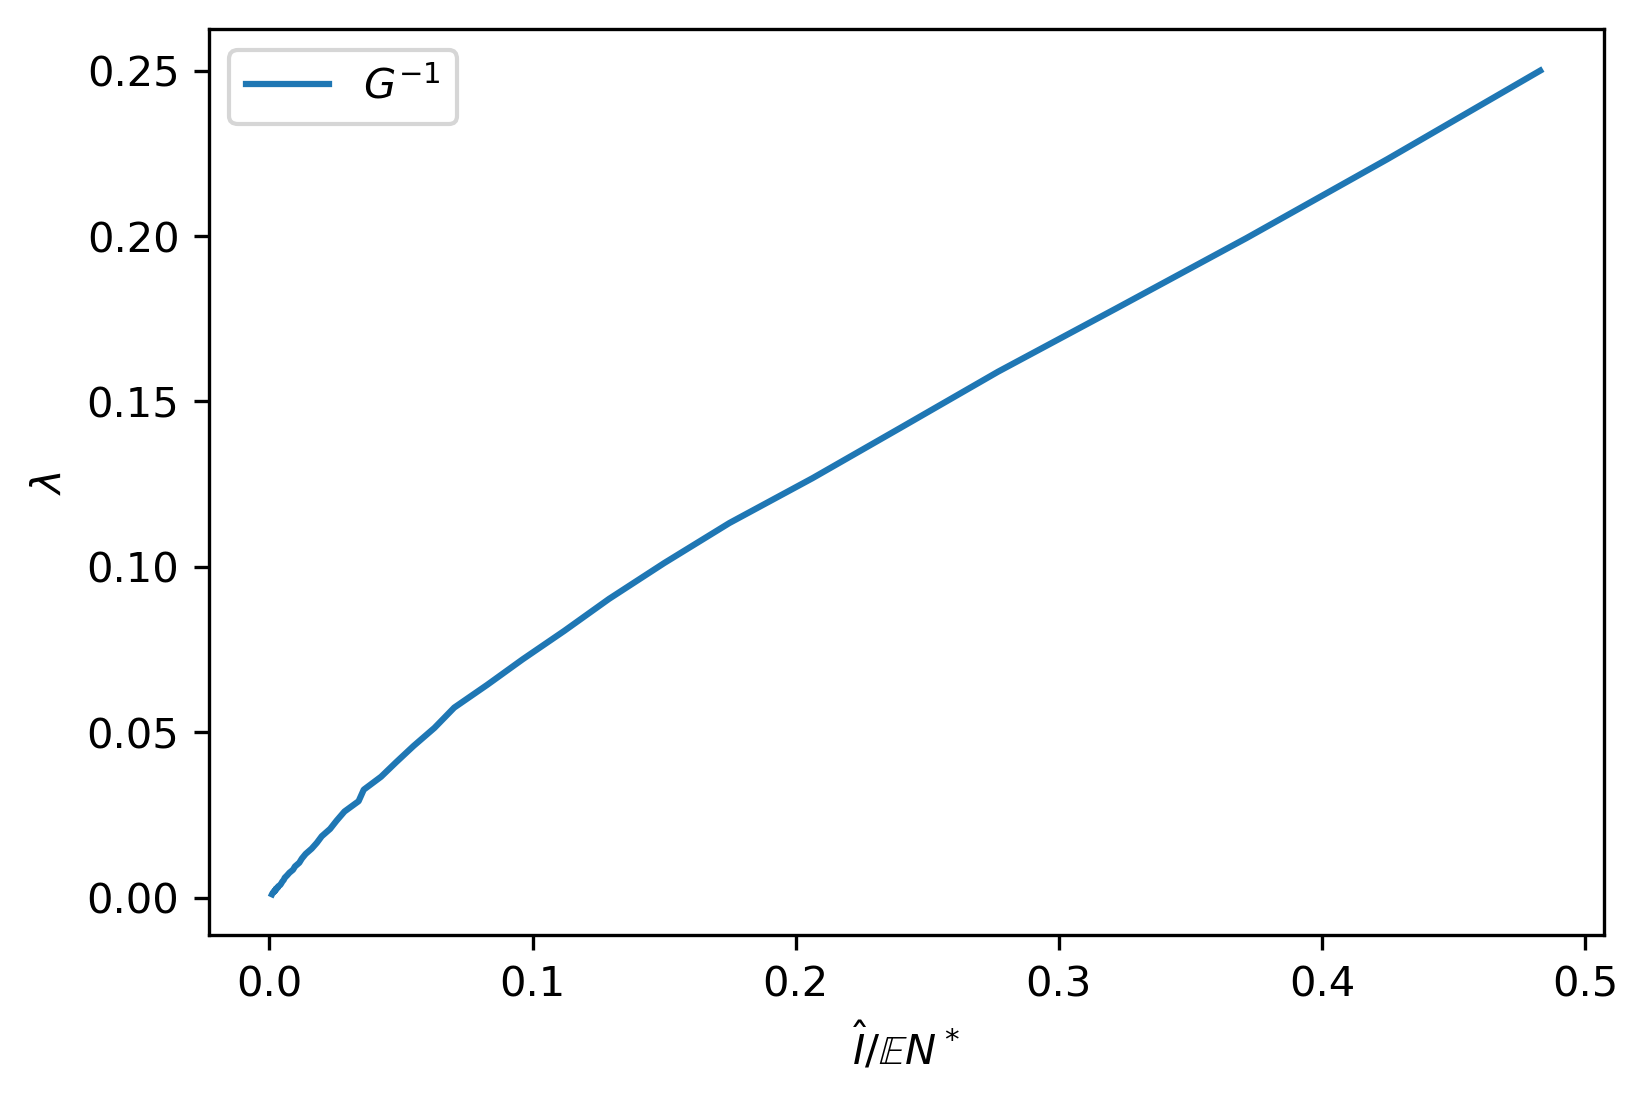

In [39]:
plt.figure(dpi=300)
plt.plot(G['G'], G['lambda'], label='$G^{-1}$')
plt.ylabel('$\lambda$')
plt.xlabel('$\hat{I}/\mathbb{E}N^*$')
plt.legend()
plt.savefig(str(attack_rate.RESULTS_DIR  / 'G_inverse.png'))
plt.show()

# $\hat{I}$

In [40]:
i_hat = attack_rate.get_known_secondary_infected_count(index_cases)

In [41]:
i_hat

3713

In [42]:
# i_hat = 3553


# $\hat{\lambda}$

$\hat{\lambda} = G^{-1} \left(\frac{\hat{I}}{\mathbb{E}N^*}\right)$

In [ ]:
lambda_hat = calc.get_lambda_hat(g_df, i_hat, EN_asterisk)

# Second part

For each index patient take their age

sample household size 

sample how many people in this household will be infected - say 2

sample 2 people from this household and note their ages

for each age group I get a distribution of the number of infected

get a two-sided confidence interval with alpha=0.01 of infected I

In [ ]:
## Probability of getting infected

In [48]:
prob_table, expected_infected = calc.get_probabilities_of_infection(lambda_hat)
prob_table

array([[0.9171 , 0.0829 , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.841  , 0.1404 , 0.0186 , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.7689 , 0.17925, 0.04475, 0.0071 , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.70625, 0.19685, 0.0702 , 0.0226 , 0.0041 , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.64805, 0.2067 , 0.09095, 0.0374 , 0.01435, 0.00255, 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.59475, 0.2068 , 0.1067 , 0.0548 , 0.02565, 0.00955, 0.00175,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.54485, 0.2056 , 0.11225, 0.06785, 0.0383 , 0.02045, 0.00845,
        0.00225, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],

In [50]:
sampled_households, wielkosci_domkow = attack_rate.sample_household(
    index_cases_grouped_by_age, 
    elderly_grouped,
    prob_table)

  0%|                                                   | 0/16 [00:00<?, ?it/s]

Check: Index cases count: 68


 69%|██████████████████████████▊            | 11/16 [1:00:01<21:11, 254.33s/it]

KeyboardInterrupt: 

In [ ]:
print(f'Number of drawn households {sum(wielkosci_domkow[0,:])} should be equal to '
          f'the number of index cases  {len(index_cases.index)}')
conf_intervals = calc.get_infected_confidence_interval(sampled_households)
print('Confidence intervals: ', conf_intervals)
means = calc.get_means(sampled_households)
print('Means of infected: ', means)
print('Sum of means: ', sum(means))
print('Known secondary infected (age-grouped)', attack_rate.get_known_secondary_infected_age_grouped(
    patient_data_path=patient_data_file))